In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/data-income-age-group.csv')
df

Name  Age  Income($)
0        Rob   27      70000
1    Michael   29      90000
2      Mohan   29      61000
3     Ismail   28      60000
4       Kory   42     150000
5     Gautam   39     155000
6      David   41     160000
7     Andrea   38     162000
8       Brad   36     156000
9   Angelina   35     130000
10    Donald   37     137000
11       Tom   26      45000
12    Arnold   27      48000
13     Jared   28      51000
14     Stark   29      49500
15    Ranbir   32      53000
16    Dipika   40      65000
17  Priyanka   41      63000
18      Nick   43      64000
19      Alia   39      80000
20       Sid   41      82000
21     Abdul   39      58000

In [ ]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [ ]:
df.describe()

Age      Income($)
count  22.000000      22.000000
mean   34.818182   90431.818182
std     5.901060   43505.964412
min    26.000000   45000.000000
25%    29.000000   58500.000000
50%    36.500000   67500.000000
75%    39.750000  135250.000000
max    43.000000  162000.000000

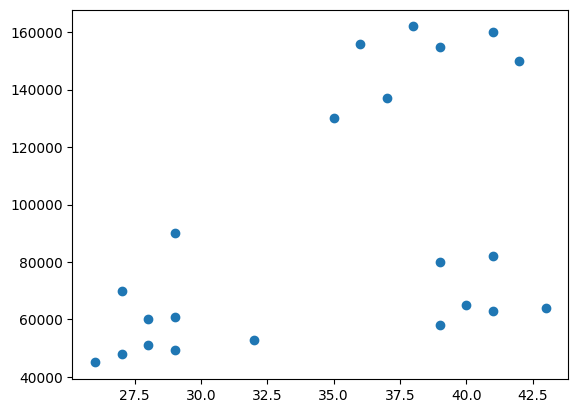

In [ ]:
plt.scatter(df['Age'],df['Income($)'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()


In [ ]:
df['Age']=scale.fit_transform(df[['Age']])
df['Income($)']=scale.fit_transform(df[['Income($)']])
df

Name       Age  Income($)
0        Rob  0.058824   0.213675
1    Michael  0.176471   0.384615
2      Mohan  0.176471   0.136752
3     Ismail  0.117647   0.128205
4       Kory  0.941176   0.897436
5     Gautam  0.764706   0.940171
6      David  0.882353   0.982906
7     Andrea  0.705882   1.000000
8       Brad  0.588235   0.948718
9   Angelina  0.529412   0.726496
10    Donald  0.647059   0.786325
11       Tom  0.000000   0.000000
12    Arnold  0.058824   0.025641
13     Jared  0.117647   0.051282
14     Stark  0.176471   0.038462
15    Ranbir  0.352941   0.068376
16    Dipika  0.823529   0.170940
17  Priyanka  0.882353   0.153846
18      Nick  1.000000   0.162393
19      Alia  0.764706   0.299145
20       Sid  0.882353   0.316239
21     Abdul  0.764706   0.111111

In [ ]:
x=df[['Age','Income($)']]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sse=[]
for i in range(1,11):
  model=KMeans(n_clusters=i)
  model.fit_predict(x)
  sse.append(model.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3687734076440591,
 0.27687406216004695,
 0.23022348815682744,
 0.19572158456056662,
 0.1397684499538816,
 0.12419833826282531,
 0.08272341876466036]

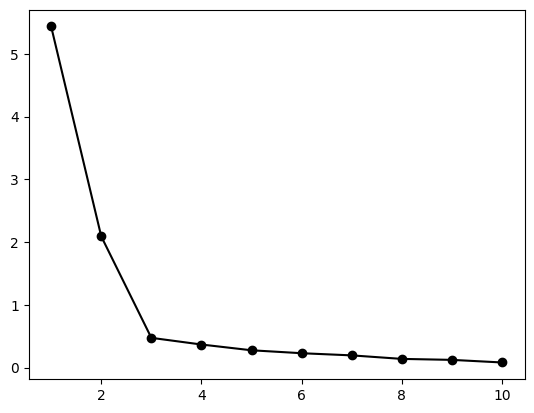

In [ ]:
plt.plot(range(1,11),sse,marker='o',color='black')

In [ ]:
model=KMeans(n_clusters=3)
ypred=model.fit_predict(x)
ypred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['group']=ypred
df

Name       Age  Income($)  group
0        Rob  0.058824   0.213675      0
1    Michael  0.176471   0.384615      0
2      Mohan  0.176471   0.136752      0
3     Ismail  0.117647   0.128205      0
4       Kory  0.941176   0.897436      1
5     Gautam  0.764706   0.940171      1
6      David  0.882353   0.982906      1
7     Andrea  0.705882   1.000000      1
8       Brad  0.588235   0.948718      1
9   Angelina  0.529412   0.726496      1
10    Donald  0.647059   0.786325      1
11       Tom  0.000000   0.000000      0
12    Arnold  0.058824   0.025641      0
13     Jared  0.117647   0.051282      0
14     Stark  0.176471   0.038462      0
15    Ranbir  0.352941   0.068376      0
16    Dipika  0.823529   0.170940      2
17  Priyanka  0.882353   0.153846      2
18      Nick  1.000000   0.162393      2
19      Alia  0.764706   0.299145      2
20       Sid  0.882353   0.316239      2
21     Abdul  0.764706   0.111111      2

In [ ]:
group1=df[df['group']==0]
group2=df[df['group']==1]
group3=df[df['group']==2]

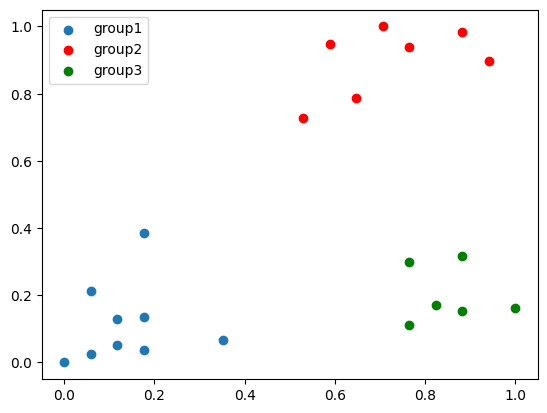

In [ ]:
plt.scatter(group1['Age'],group1['Income($)'],label='group1')
plt.scatter(group2['Age'],group2['Income($)'],label='group2',color='red')
plt.scatter(group3['Age'],group3['Income($)'],label='group3',color='green')
plt.legend()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dd=pd.read_csv('/content/Mall_Customers.csv')
dd

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dd.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [ ]:
dd.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
dd.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dd['Gender']=le.fit_transform(dd['Gender'])
dd

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]

In [ ]:
dd.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
x=dd[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sse=[]
for i in range(1,11):
  model=KMeans(n_clusters=i)
  model.fit_predict(x)
  sse.append(model.inertia_)
sse

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 105299.98742210327,
 79309.98781376514,
 68469.80633381111,
 51575.27793107792,
 49160.78742923743,
 41019.8005050505,
 40977.605474694145]

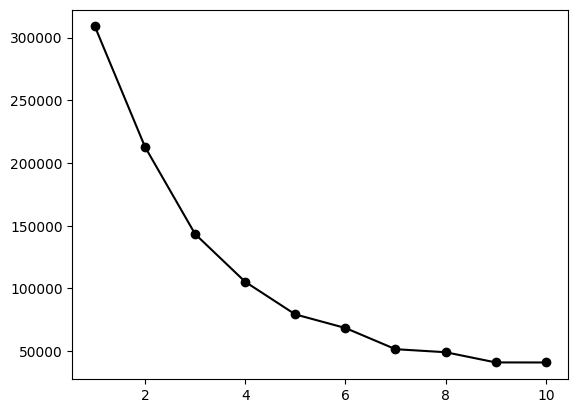

In [ ]:
plt.plot(range(1,11),sse,marker='o',color='black')

In [ ]:
model=KMeans(n_clusters=4)
ypred=model.fit_predict(x)
ypred

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 0, 0, 1, 3, 3, 1, 1, 0, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
dd['group']=ypred
dd

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1   19                  15                      39   
1             2       1   21                  15                      81   
2             3       0   20                  16                       6   
3             4       0   23                  16                      77   
4             5       0   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       0   35                 120                      79   
196         197       0   45                 126                      28   
197         198       1   32                 126                      74   
198         199       1   32                 137                      18   
199         200       1   30                 137                      83   

     group  
0        0  
1        3  
2        0  
3        3  
4        0  
..     ...  
195      2  
196      1  
197      2  
198      1  
199      2  

[200 rows x 6 columns]

In [ ]:
group1=dd[dd['group']==0]
group2=dd[dd['group']==1]
group3=dd[dd['group']==2]
group4=dd[dd['group']==3]

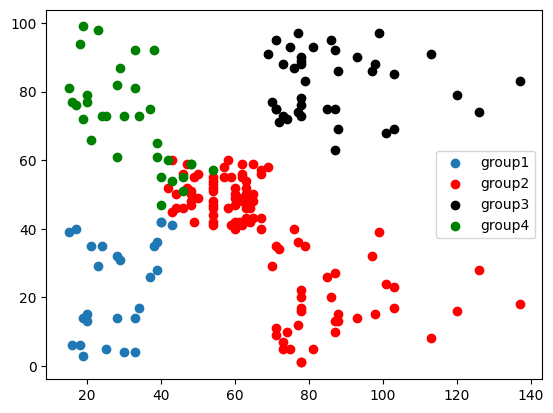

In [ ]:
plt.scatter(group1['Annual Income (k$)'],group1['Spending Score (1-100)'],label='group1')
plt.scatter(group2['Annual Income (k$)'],group2['Spending Score (1-100)'],label='group2',color='red')
plt.scatter(group3['Annual Income (k$)'],group3['Spending Score (1-100)'],label='group3',color='black')
plt.scatter(group4['Annual Income (k$)'],group4['Spending Score (1-100)'],label='group4',color='green')
plt.legend()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
data=iris.data
feature=iris.feature_names

In [ ]:
fd=pd.DataFrame(data,columns=feature)
fd

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [ ]:
x=fd[['petal length (cm)','petal width (cm)']]
x.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

In [ ]:
fd.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

pd.DataFrame(x_scaled,columns=['petal length (cm)','petal width (cm)']).head()

petal length (cm)  petal width (cm)
0          -1.340227         -1.315444
1          -1.340227         -1.315444
2          -1.397064         -1.315444
3          -1.283389         -1.315444
4          -1.340227         -1.315444

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sse=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,random_state=42)
  model.fit_predict(x_scaled)
  sse.append(model.inertia_)
sse

[300.0000000000001,
 54.16878133149559,
 18.026962612544075,
 12.497581514219771,
 10.119112740536481,
 7.282738777626413,
 6.011187013148224,
 5.130918624626857,
 4.427993581193409,
 3.968688438926203]

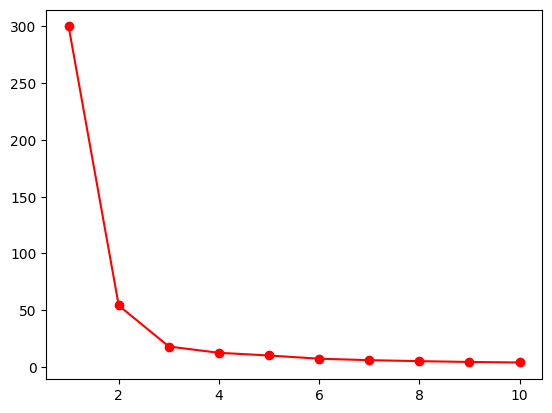

In [ ]:
plt.plot(range(1,11),sse,marker='o',color='red')

In [ ]:
optimal=3
model=KMeans(n_clusters=optimal)
ypred=model.fit_transform(x_scaled)
ypred

array([[2.21418054, 3.40276477, 0.07005856],
       [2.21418054, 3.40276477, 0.07005856],
       [2.25675565, 3.44256392, 0.11020211],
       [2.17225824, 3.36345519, 0.0642875 ],
       [2.21418054, 3.40276477, 0.07005856],
       [1.91308685, 3.09564779, 0.24370391],
       [2.12839477, 3.30951191, 0.07933703],
       [2.17225824, 3.36345519, 0.0642875 ],
       [2.21418054, 3.40276477, 0.07005856],
       [2.26404309, 3.46026356, 0.19339282],
       [2.17225824, 3.36345519, 0.0642875 ],
       [2.13102727, 3.32465255, 0.0990886 ],
       [2.30429614, 3.49848556, 0.19538706],
       [2.42903591, 3.61608889, 0.28154569],
       [2.29994731, 3.48283585, 0.16075384],
       [2.00207331, 3.17735847, 0.20386091],
       [2.09345116, 3.26098487, 0.22264522],
       [2.12839477, 3.30951191, 0.07933703],
       [1.99944453, 3.18972103, 0.15281154],
       [2.08474811, 3.26908119, 0.07429028],
       [2.09052855, 3.28637479, 0.14820663],
       [2.00207331, 3.17735847, 0.20386091],
       [2.

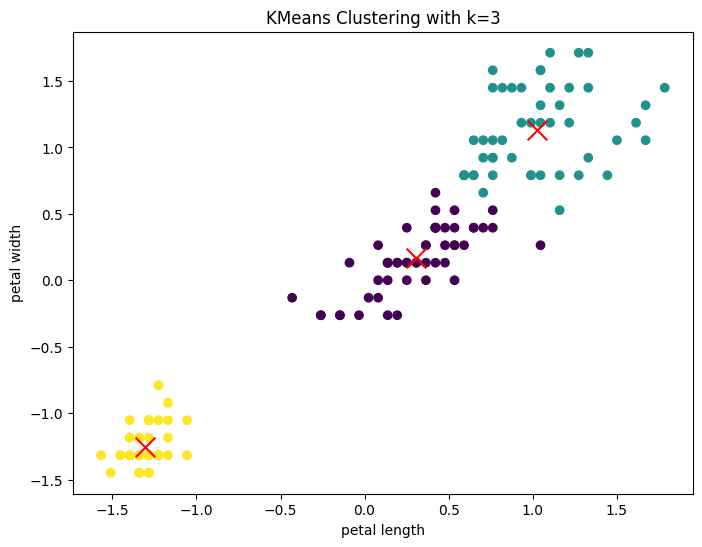

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=model.labels_,cmap='viridis')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=200,c='red',marker='x')
plt.title(f'KMeans Clustering with k={optimal}')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()